<a href="https://colab.research.google.com/github/koushik395/Car-damage-assessment-using-Densenet/blob/main/Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import random
from tqdm import tqdm
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
import os

In [ ]:
path = os.getcwd()
path

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **EDA**

## **DATA 1**

In [ ]:
train_damaged_list = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/00-damage')

In [ ]:
train_not_damaged_list = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/01-whole')

In [ ]:
test_damaged_list = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/validation/00-damage')

In [ ]:
test_not_damaged_list = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/validation/01-whole')

In [ ]:
def plot_bar(class_labels,counts,name):
    plt.figure(figsize = (5,5))
    f = sns.barplot(x = classes,y =counts)
    plt.xlabel("Class labels", fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title("Number of Images in "+name+' folder', fontsize=15)
    plt.show()

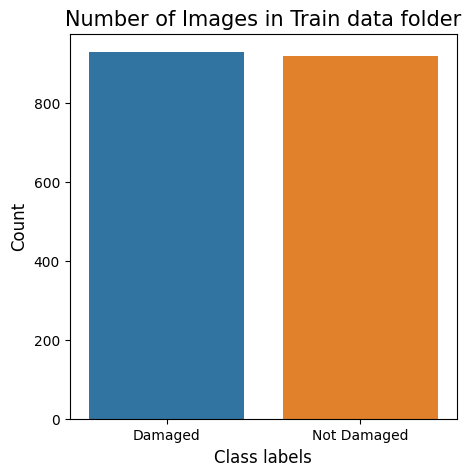

Number of Damaged images in train is 930
Number of Not Damaged images in train is 920


In [ ]:
classes = ['Damaged','Not Damaged']
counts = [len(train_damaged_list),len(train_not_damaged_list)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train is '+str(counts[i]))

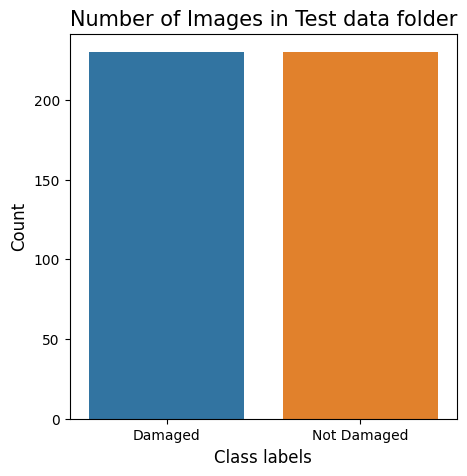

Number of Damaged images in test is 230
Number of Not Damaged images in test is 230


In [ ]:
classes = ['Damaged','Not Damaged']
counts = [len(test_damaged_list),len(test_not_damaged_list)]
plot_bar(classes,counts,'Test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test is '+str(counts[i]))

In [ ]:
def img_shapes(files,path):
    shapes = []
    for i in files:
        img = cv2.imread(path+'/'+i)
        shapes.append(img.shape)
    return shapes

In [ ]:
train_dmg = img_shapes(train_damaged_list,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/00-damage')
train_no_dmg = img_shapes(train_not_damaged_list,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/01-whole')
train_df = pd.DataFrame(list(zip(train_dmg,train_no_dmg)),columns = classes)

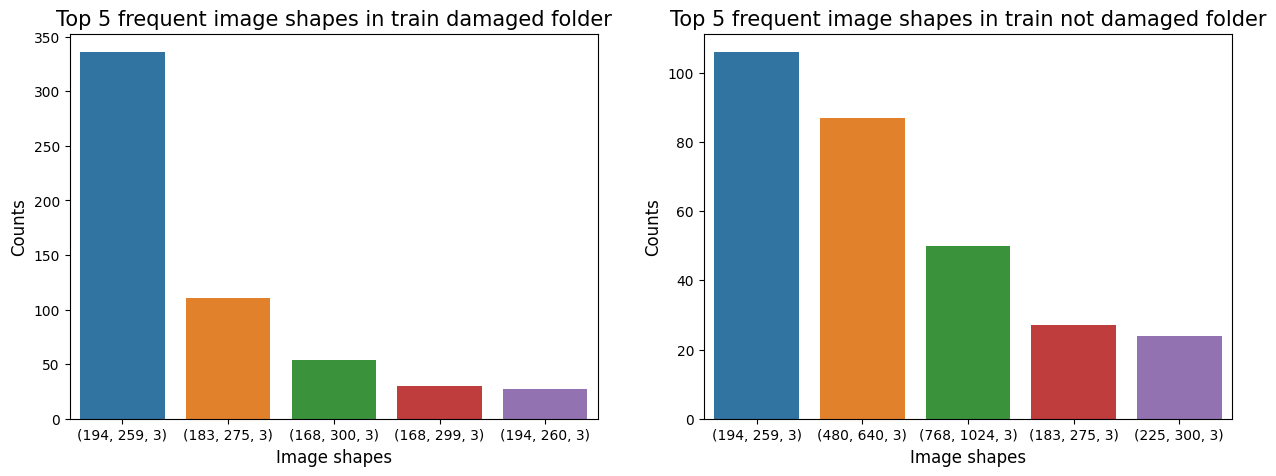

No of unique image shapes in train damaged are  132
No of unique image shapes in train not damaged are  385


In [ ]:
#Damaged train
num = [str(i) for i in train_df['Damaged'].value_counts().index[:5]]
counts_val = [i for i in train_df['Damaged'].value_counts()[:5]]
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 frequent image shapes in train damaged folder", fontsize=15)

#Not Damaged train
num = [str(i) for i in train_df['Not Damaged'].value_counts().index[:5]]
counts_val = [i for i in train_df['Not Damaged'].value_counts()[:5]]
plt.subplot(1,2,2)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 frequent image shapes in train not damaged folder", fontsize=15)
plt.show()

print('No of unique image shapes in train damaged are ',len(train_df['Damaged'].unique()))
print('No of unique image shapes in train not damaged are ',len(train_df['Not Damaged'].unique()))

## **DATA 2**

In [ ]:
train_front = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/00-front')
train_rear = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/01-rear')
train_side = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/02-side')


In [ ]:
test_front = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/00-front')
test_rear = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/01-rear')
test_side = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/02-side')


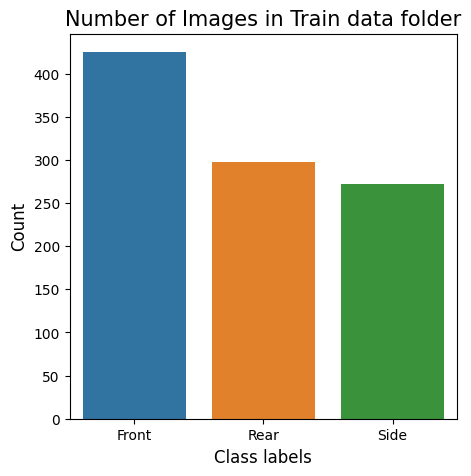

Number of Front images in train is 425
Number of Rear images in train is 298
Number of Side images in train is 272


In [ ]:
classes = ['Front','Rear','Side']
counts = [len(train_front),len(train_rear),len(train_side)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train is '+str(counts[i]))

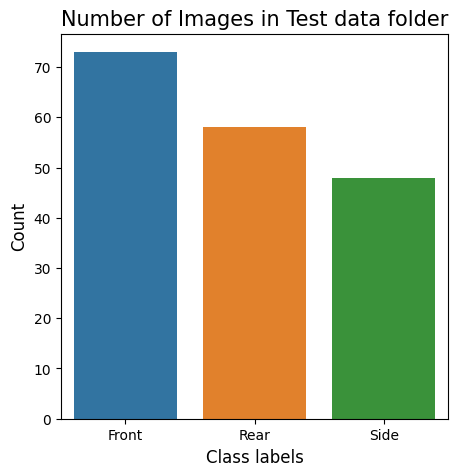

Number of Front images in test is 73
Number of Rear images in test is 58
Number of Side images in test is 48


In [ ]:
classes = ['Front','Rear','Side']
counts = [len(test_front),len(test_rear),len(test_side)]
plot_bar(classes,counts,'Test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test is '+str(counts[i]))

In [ ]:
train_front_shape = img_shapes(train_front,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/00-front')
train_rear_shape = img_shapes(train_rear,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/01-rear')
train_side_shape = img_shapes(train_side,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/02-side')
train_df = pd.DataFrame(list(zip(train_front_shape,train_rear_shape,train_side_shape)),columns = classes)

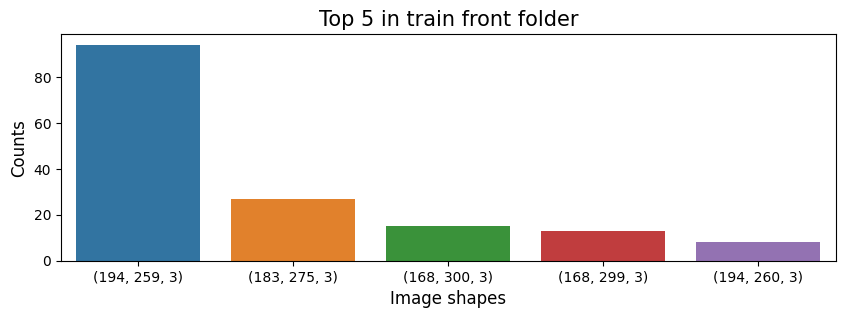

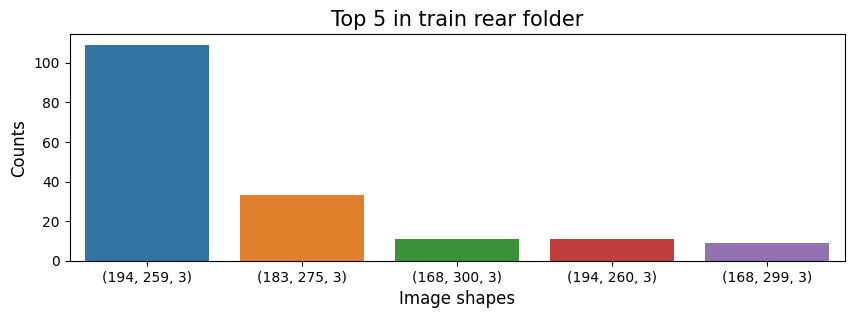

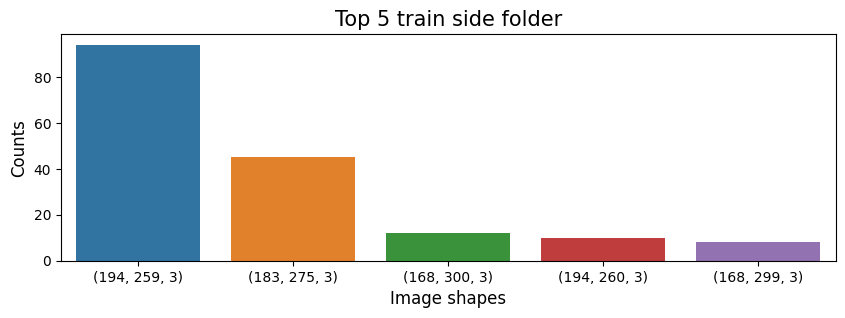

No of unique image shapes in train front are  65
No of unique image shapes in train rear are  65
No of unique image shapes in train side are  60


In [ ]:
#Front train
num = [str(i) for i in train_df['Front'].value_counts().index[:5]]
counts_val = [i for i in train_df['Front'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 in train front folder", fontsize=15)

#Rear train
plt.figure(figsize = (10,10))
num = [str(i) for i in train_df['Rear'].value_counts().index[:5]]
counts_val = [i for i in train_df['Rear'].value_counts()[:5]]
plt.subplot(3,1,2)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 in train rear folder", fontsize=15)
plt.show()

#Side train
plt.figure(figsize = (10,10))
num = [str(i) for i in train_df['Side'].value_counts().index[:5]]
counts_val = [i for i in train_df['Side'].value_counts()[:5]]
plt.subplot(3,1,3)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 train side folder", fontsize=15)
plt.show()


print('No of unique image shapes in train front are ',len(train_df['Front'].unique()))
print('No of unique image shapes in train rear are ',len(train_df['Rear'].unique()))
print('No of unique image shapes in train side are ',len(train_df['Side'].unique()))


## **DATA 3**

In [ ]:
train_minor = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/01-minor')
train_moderate = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/02-moderate')
train_severe = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/03-severe')

In [ ]:
test_minor = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/01-minor')
test_moderate = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/02-moderate')
test_severe = os.listdir('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/03-severe')

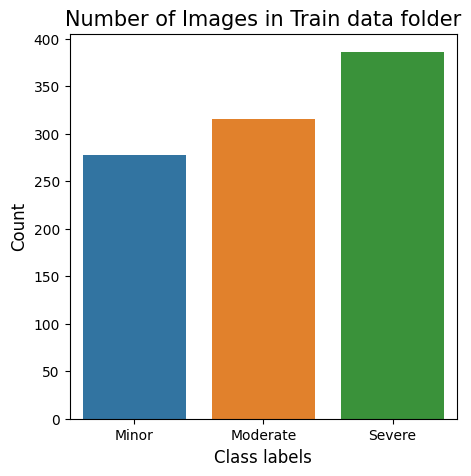

Number of Minor images in train is 278
Number of Moderate images in train is 315
Number of Severe images in train is 386


In [ ]:
classes = ['Minor','Moderate','Severe']
counts = [len(train_minor),len(train_moderate),len(train_severe)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train is '+str(counts[i]))

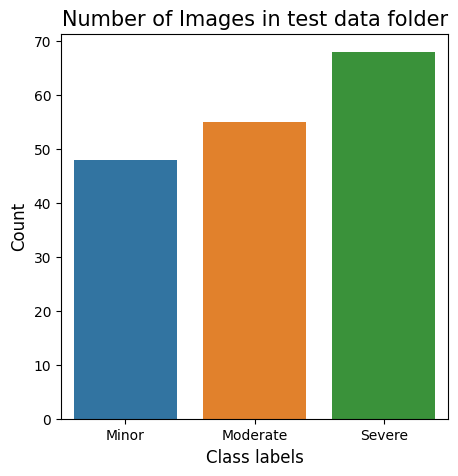

Number of Minor images in test is 48
Number of Moderate images in test is 55
Number of Severe images in test is 68


In [ ]:
classes = ['Minor','Moderate','Severe']
counts = [len(test_minor),len(test_moderate),len(test_severe)]
plot_bar(classes,counts,'test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test is '+str(counts[i]))

In [ ]:
train_minor_shape = img_shapes(train_minor,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/01-minor')
train_moderate_shape = img_shapes(train_moderate,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/02-moderate')
train_severe_shape = img_shapes(train_severe,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/03-severe')
train_df = pd.DataFrame(list(zip(train_minor_shape,train_moderate_shape,train_severe_shape)),columns = classes)

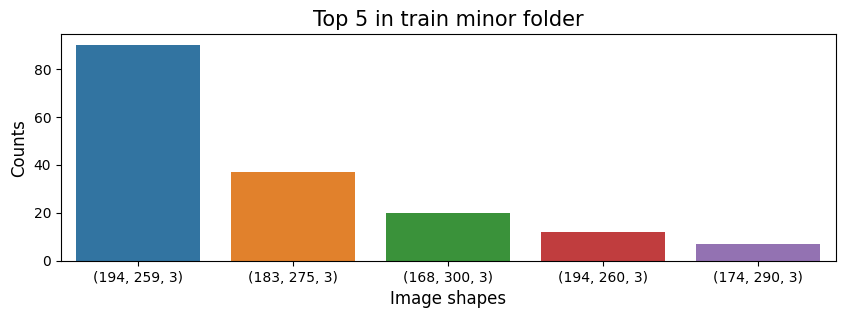

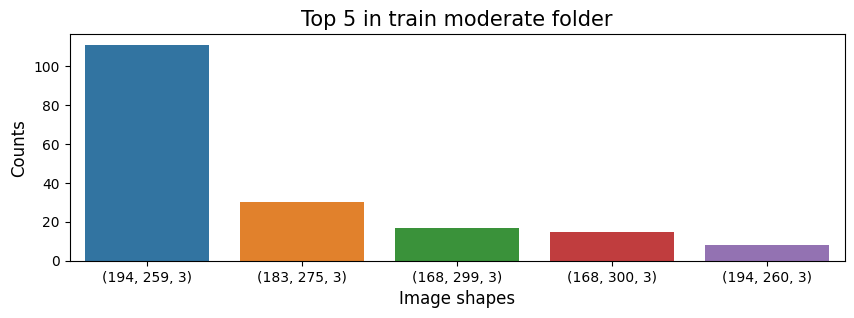

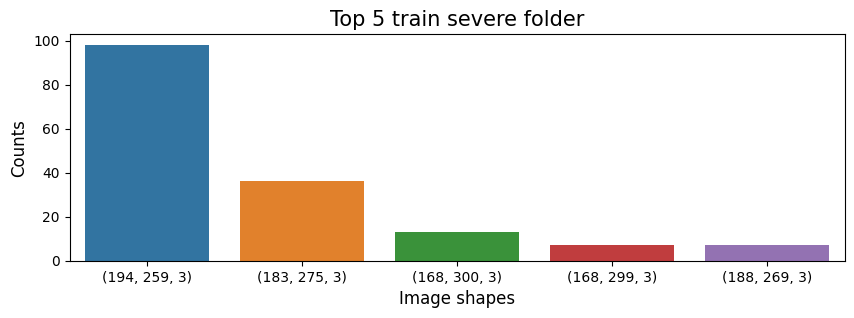

No of unique image shapes in train minor are  66
No of unique image shapes in train moderate are  61
No of unique image shapes in train severe are  69


In [ ]:
#Front train
num = [str(i) for i in train_df['Minor'].value_counts().index[:5]]
counts_val = [i for i in train_df['Minor'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 in train minor folder", fontsize=15)

#Rear train
plt.figure(figsize = (10,10))
num = [str(i) for i in train_df['Moderate'].value_counts().index[:5]]
counts_val = [i for i in train_df['Moderate'].value_counts()[:5]]
plt.subplot(3,1,2)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 in train moderate folder", fontsize=15)
plt.show()

#Side train
plt.figure(figsize = (10,10))
num = [str(i) for i in train_df['Severe'].value_counts().index[:5]]
counts_val = [i for i in train_df['Severe'].value_counts()[:5]]
plt.subplot(3,1,3)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 train severe folder", fontsize=15)
plt.show()


print('No of unique image shapes in train minor are ',len(train_df['Minor'].unique()))
print('No of unique image shapes in train moderate are ',len(train_df['Moderate'].unique()))
print('No of unique image shapes in train severe are ',len(train_df['Severe'].unique()))


## **Data without Augmentation**

In [ ]:
lists = [['damaged','not_damaged'],['front','rear','side'],['minor','moderate','severe']]

In [ ]:
data = ['data_1','data_2','data_3']

In [ ]:
paths = []
def create_folders(name,class_lists,data):
    os.mkdir(name)
    for i in range(3):
        os.mkdir(name+'/'+data[i])
        for j in ['train','test']:
            temp_paths = []
            os.mkdir(name+'/'+data[i]+'/'+j)
            for k in class_lists[i]:
                os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
                temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
            paths.append(temp_paths)
create_folders('data',lists,data)

In [ ]:
print(paths)

[['data/data_1/train/damaged', 'data/data_1/train/not_damaged'], ['data/data_1/test/damaged', 'data/data_1/test/not_damaged'], ['data/data_2/train/front', 'data/data_2/train/rear', 'data/data_2/train/side'], ['data/data_2/test/front', 'data/data_2/test/rear', 'data/data_2/test/side'], ['data/data_3/train/minor', 'data/data_3/train/moderate', 'data/data_3/train/severe'], ['data/data_3/test/minor', 'data/data_3/test/moderate', 'data/data_3/test/severe']]


In [ ]:
#Saving images
def save_images(name,save_path,image_path):

    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)

    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

## **Data -1**

In [ ]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

data/data_1/train/damaged
data/data_1/train/not_damaged
data/data_1/test/damaged
data/data_1/test/not_damaged


In [ ]:
for i in tqdm(train_damaged_list):
    save_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/00-damage')

100%|██████████| 930/930 [00:01<00:00, 509.35it/s]


In [ ]:
for i in tqdm(train_not_damaged_list):
    save_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/01-whole')

100%|██████████| 920/920 [00:04<00:00, 195.78it/s]


In [ ]:
for i in tqdm(test_damaged_list):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/validation/00-damage')

100%|██████████| 230/230 [00:32<00:00,  7.13it/s]


In [ ]:
for i in tqdm(test_not_damaged_list):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/validation/01-whole')

100%|██████████| 230/230 [00:55<00:00,  4.11it/s]


## **Data - 2**

In [ ]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data/data_2/train/front
data/data_2/train/rear
data/data_2/train/side
data/data_2/test/front
data/data_2/test/rear
data/data_2/test/side


In [ ]:
for i in tqdm(train_front):
    save_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/00-front')

100%|██████████| 425/425 [00:00<00:00, 524.91it/s]


In [ ]:
for i in tqdm(train_rear):
    save_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/01-rear')

100%|██████████| 298/298 [00:00<00:00, 497.70it/s]


In [ ]:
for i in tqdm(train_side):
    save_images(i,train_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/02-side')

100%|██████████| 272/272 [00:00<00:00, 512.57it/s]


In [ ]:
for i in tqdm(test_front):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/00-front')

100%|██████████| 73/73 [00:09<00:00,  7.30it/s]


In [ ]:
for i in tqdm(test_rear):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/01-rear')

100%|██████████| 58/58 [00:07<00:00,  7.28it/s]


In [ ]:
for i in tqdm(test_side):
    save_images(i,test_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/02-side')

100%|██████████| 48/48 [00:06<00:00,  7.52it/s]


## **Data 3**


In [ ]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data/data_3/train/minor
data/data_3/train/moderate
data/data_3/train/severe
data/data_3/test/minor
data/data_3/test/moderate
data/data_3/test/severe


In [ ]:
for i in tqdm(train_minor):
    save_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/01-minor')


100%|██████████| 278/278 [00:00<00:00, 497.26it/s]


In [ ]:
for i in tqdm(train_moderate):
    save_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/02-moderate')

100%|██████████| 315/315 [00:00<00:00, 483.48it/s]


In [ ]:
for i in tqdm(train_severe):
    save_images(i,train_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/03-severe')

100%|██████████| 386/386 [00:00<00:00, 496.03it/s]


In [ ]:
for i in tqdm(test_minor):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/01-minor')

100%|██████████| 48/48 [00:06<00:00,  7.37it/s]


In [ ]:
print(test_moderate)

['0045.JPEG', '0036.JPEG', '0048.JPEG', '0030.JPEG', '0010.JPEG', '0026.JPEG', '0054.JPEG', '0027.JPEG', '0025.JPEG', '0033.JPEG', '0024.jpeg', '0003.JPEG', '0012.jpeg', '0032.JPEG', '0029.JPEG', '0052.JPEG', '0051.JPEG', '0037.JPEG', '0055.JPEG', '0009.JPEG', '0008.JPEG', '0004.JPEG', '0039.JPEG', '0023.JPEG', '0014.JPEG', '0050.JPEG', '0042.JPEG', '0016.JPEG', '0017.JPEG', '0028.JPEG', '0006.JPEG', '0035.JPEG', '0031.JPEG', '0022.JPEG', '0020.JPEG', '0007.JPEG', '0001.JPEG', '0013.JPEG', '0043.JPEG', '0018.JPEG', '0038.JPEG', '0046.JPEG', '0044.JPEG', '0005.JPEG', '0002.JPEG', '0019.JPEG', '0047.JPEG', '0021.JPEG', '0015.jpeg', '0040.JPEG', '0034.JPEG', '0011.jpeg', '0049.JPEG', '0053.JPEG', '0041.JPEG']


In [ ]:
for i in tqdm(test_moderate):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:08<00:00,  6.73it/s]


In [ ]:
for i in tqdm(test_severe):
    save_images(i,test_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/03-severe')

100%|██████████| 68/68 [00:13<00:00,  5.03it/s]


In [ ]:
import os

if os.path.exists('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/02-moderate/0008.JPEG'):
    print('File exists')
else:
    print('File does not exist')

File exists


## **Data Augmentation**

### **Data Augmentation - 1**

### *Enlarging the dataset twice using random rotation between -20 and 20 degrees and horizontal flip transformations.*

In [ ]:
lists = [['damaged','not_damaged'],['front','rear','side'],['minor','moderate','severe']]

In [ ]:
data = ['data_1','data_2','data_3']

In [ ]:
paths = []
def create_folders(name,class_lists,data):
    os.mkdir(name)
    for i in range(3):
        os.mkdir(name+'/'+data[i])
        for j in ['train','test']:
            temp_paths = []
            os.mkdir(name+'/'+data[i]+'/'+j)
            for k in class_lists[i]:
                os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
                temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
            paths.append(temp_paths)
create_folders('data_augmentation_1',lists,data)

## **Data 1**
### **Visualization**

In [ ]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_damaged_list)

In [ ]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [ ]:
augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)

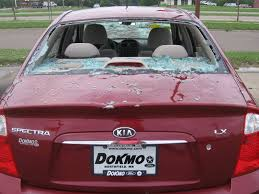

In [ ]:
sample_img = image.load_img('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/00-damage'+'/'+sample_file)
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)

In [ ]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)
sample_img_array.shape

(1, 194, 259, 3)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False)
    samples.append(img_save)

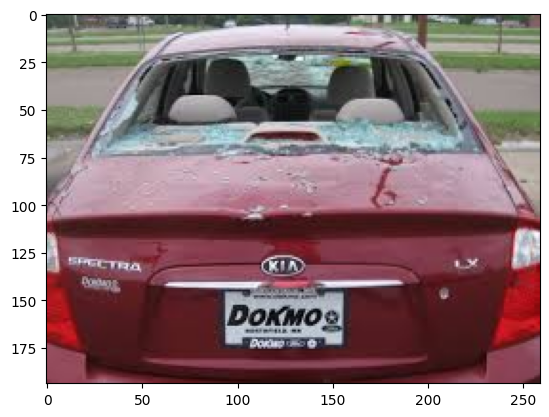

In [ ]:
plt.imshow(samples[0])

### **Generating images and saving in folders**

In [ ]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

data_augmentation_1/data_1/train/damaged
data_augmentation_1/data_1/train/not_damaged
data_augmentation_1/data_1/test/damaged
data_augmentation_1/data_1/test/not_damaged


In [ ]:
#Creating a function to create images
def create_images(name,save_path,image_path):
    #Generating a random number for rotation
    rotation = random.randint(-20,20)
    #Creating Image Data Generator:
    augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)

    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)

    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

    #Getting the numpy array of image.
    image_arr = image.img_to_array(image_org)

    #Expanding dimensions of image array
    image_arr = image_arr.reshape((1,) + image_arr.shape)

    #Using Flow to generate 2 new images for single image
    for arr,val in zip(augmentation.flow(image_arr, batch_size=1, save_format='jpeg'),range(1)):
        name = name.split('.')[0]
        img_save = image.array_to_img(arr[0], scale=False)
        img_save.save(save_path+'/'+name+'_aug_'+str(val)+'.jpeg')
    return paths

In [ ]:
#Saving images
def save_images(name,save_path,image_path):

    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)

    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

In [ ]:
for i in tqdm(train_damaged_list):
    create_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/00-damage')

100%|██████████| 930/930 [00:17<00:00, 53.64it/s]


In [ ]:
for i in tqdm(train_not_damaged_list):
    create_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/01-whole')

100%|██████████| 920/920 [02:05<00:00,  7.34it/s]


In [ ]:
for i in tqdm(test_damaged_list):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/validation/00-damage')

100%|██████████| 230/230 [00:00<00:00, 500.28it/s]


In [ ]:
for i in tqdm(test_not_damaged_list):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/validation/01-whole')

100%|██████████| 230/230 [00:01<00:00, 176.29it/s]


## **Data -2**
### **Visualization**

In [ ]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_front)

In [ ]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [ ]:
augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)

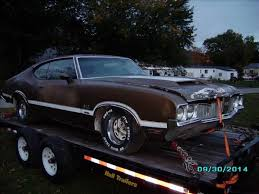

In [ ]:
sample_img = image.load_img('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/00-front'+'/'+sample_file)
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)

In [ ]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

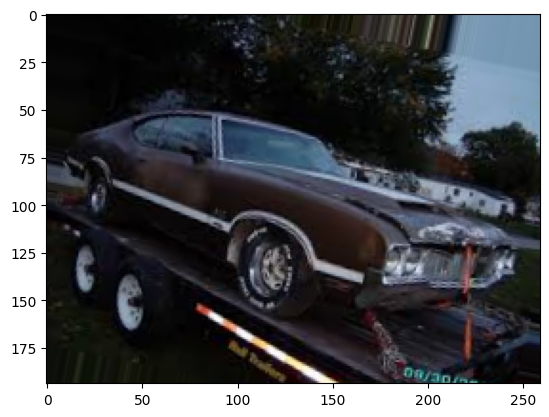

In [ ]:
plt.imshow(samples[0])

### **Generating images and saving in folders**

In [ ]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data_augmentation_1/data_2/train/front
data_augmentation_1/data_2/train/rear
data_augmentation_1/data_2/train/side
data_augmentation_1/data_2/test/front
data_augmentation_1/data_2/test/rear
data_augmentation_1/data_2/test/side


In [ ]:
for i in tqdm(train_front):
    create_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/00-front')

100%|██████████| 425/425 [00:07<00:00, 54.61it/s]


In [ ]:
for i in tqdm(train_rear):
    create_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/01-rear')

100%|██████████| 298/298 [00:06<00:00, 47.14it/s]


In [ ]:
for i in tqdm(train_side):
    create_images(i,train_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/02-side')

100%|██████████| 272/272 [00:04<00:00, 54.54it/s]


In [ ]:
for i in tqdm(test_front):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/00-front')

100%|██████████| 73/73 [00:00<00:00, 437.64it/s]


In [ ]:
for i in tqdm(test_rear):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/01-rear')

100%|██████████| 58/58 [00:00<00:00, 501.19it/s]


In [ ]:
for i in tqdm(test_side):
    save_images(i,test_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/02-side')

100%|██████████| 48/48 [00:00<00:00, 490.02it/s]


## **Data -3**
### **Visualization**

In [ ]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_severe)

In [ ]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [ ]:
augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)

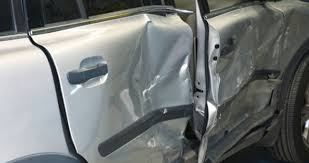

In [ ]:
sample_img = image.load_img('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/03-severe'+'/'+sample_file)
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)

In [ ]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

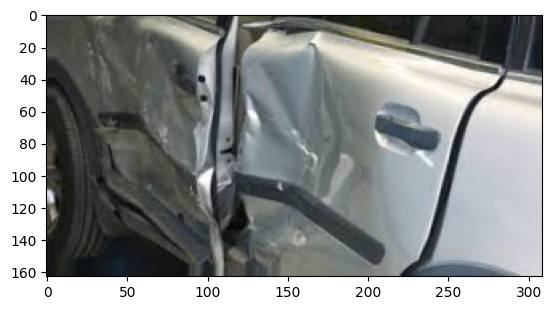

In [ ]:
plt.imshow(samples[0])

### **Generating images and saving in folders**

In [ ]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data_augmentation_1/data_3/train/minor
data_augmentation_1/data_3/train/moderate
data_augmentation_1/data_3/train/severe
data_augmentation_1/data_3/test/minor
data_augmentation_1/data_3/test/moderate
data_augmentation_1/data_3/test/severe


In [ ]:
for i in tqdm(train_minor):
    create_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/01-minor')

100%|██████████| 278/278 [00:05<00:00, 47.57it/s]


In [ ]:
for i in tqdm(train_moderate):
    create_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/02-moderate')

100%|██████████| 315/315 [00:05<00:00, 55.81it/s]


In [ ]:
for i in tqdm(train_severe):
    create_images(i,train_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/03-severe')

100%|██████████| 386/386 [00:07<00:00, 48.53it/s]


In [ ]:
for i in tqdm(test_minor):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/01-minor')

100%|██████████| 48/48 [00:00<00:00, 506.60it/s]


In [ ]:
for i in tqdm(test_moderate):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:00<00:00, 486.54it/s]


In [ ]:
for i in tqdm(test_severe):
    save_images(i,test_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/03-severe')

100%|██████████| 68/68 [00:00<00:00, 485.67it/s]


### **Files Counts after Augmentation:**

In [ ]:
data_1_files = len(os.listdir('data_augmentation_1/data_1/train/damaged'))+len(os.listdir('data_augmentation_1/data_1/train/not_damaged'))
print('Number of files for all classes damaged, not damaged is ',data_1_files)

Number of files for all classes damaged, not damaged is  3700


In [ ]:
data_2_files = len(os.listdir('data_augmentation_1/data_2/train/front'))+len(os.listdir('data_augmentation_1/data_2/train/rear'))+len(os.listdir('data_augmentation_1/data_2/train/side'))
print('Number of files for all classes front,rear,side is ',data_2_files)

Number of files for all classes front,rear,side is  1990


In [ ]:
data_3_files = len(os.listdir('data_augmentation_1/data_3/train/minor'))+len(os.listdir('data_augmentation_1/data_3/train/moderate'))+len(os.listdir('data_augmentation_1/data_3/train/severe'))
print('Number of files for all classes minor,moderate,severe is ',data_3_files)

Number of files for all classes minor,moderate,severe is  1958


## Data Augmentation - 2
In this we will use the second type of augmentation and we will visualize for a single image. In this we will create 1 new images for a each image in our data. So the data will enlarge by 2 times.

In [ ]:
lists = [['damaged','not_damaged'],['front','rear','side'],['minor','moderate','severe']]

In [ ]:
data = ['data_1','data_2','data_3']

In [ ]:
paths = []
def create_folders(name,class_lists,data):
    os.mkdir(name)
    for i in range(3):
        os.mkdir(name+'/'+data[i])
        for j in ['train','test']:
            temp_paths = []
            os.mkdir(name+'/'+data[i]+'/'+j)
            for k in class_lists[i]:
                os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
                temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
            paths.append(temp_paths)
create_folders('data_augmentation_2',lists,data)

## Data 1

In [ ]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_damaged_list)

In [ ]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [ ]:
augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

In [ ]:
sample_img = image.load_img('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/00-damage'+'/'+sample_file)

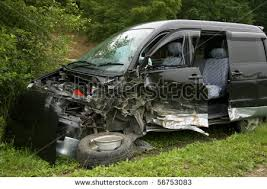

In [ ]:
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)

In [ ]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

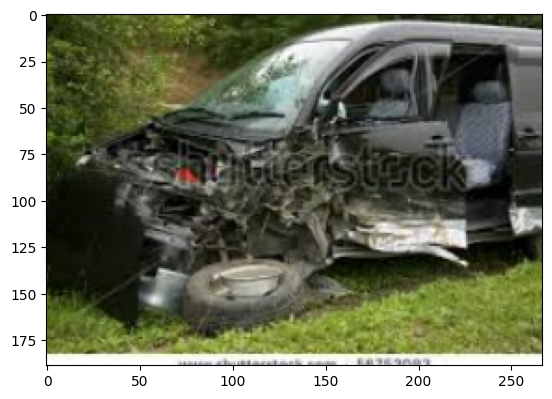

In [ ]:
plt.imshow(samples[0])

## Generating images and saving in folders

In [ ]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

data_augmentation_2/data_1/train/damaged
data_augmentation_2/data_1/train/not_damaged
data_augmentation_2/data_1/test/damaged
data_augmentation_2/data_1/test/not_damaged


In [ ]:
#Creating a function to create images
def create_images(name,save_path,image_path):
    #Generating a random number for rotation
    rotation = random.randint(-20,20)
    #Creating Image Data Generator:
    augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)

    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

    #Getting the numpy array of image.
    image_arr = image.img_to_array(image_org)

    #Expanding dimensions of image array
    image_arr = image_arr.reshape((1,) + image_arr.shape)

    #Using Flow to generate 4 new images for single image
    for arr,val in zip(augmentation.flow(image_arr, batch_size=1, save_format='jpeg'),range(1)):
        name = name.split('.')[0]
        img_save = image.array_to_img(arr[0], scale=False)
        img_save.save(save_path+'/'+name+'_aug_'+str(val)+'.jpeg')
    return paths

In [ ]:
#Saving images
def save_images(name,save_path,image_path):

    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)

    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

In [ ]:
for i in tqdm(train_damaged_list):
    create_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/00-damage')

100%|██████████| 930/930 [00:18<00:00, 50.68it/s]


In [ ]:
for i in tqdm(train_not_damaged_list):
    create_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/training/01-whole')

100%|██████████| 920/920 [02:04<00:00,  7.38it/s]


In [ ]:
for i in tqdm(test_damaged_list):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/validation/00-damage')

100%|██████████| 230/230 [00:00<00:00, 499.16it/s]


In [ ]:
for i in tqdm(test_not_damaged_list):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data1a/validation/01-whole')

100%|██████████| 230/230 [00:01<00:00, 194.18it/s]


## Data -2

In [ ]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_front)

In [ ]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [ ]:
augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

In [ ]:
sample_img = image.load_img('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/00-front'+'/'+sample_file)

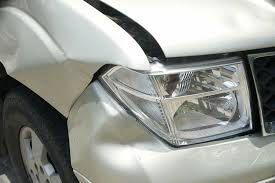

In [ ]:
sample_img


In [ ]:
sample_img_array = image.img_to_array(sample_img)

In [ ]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

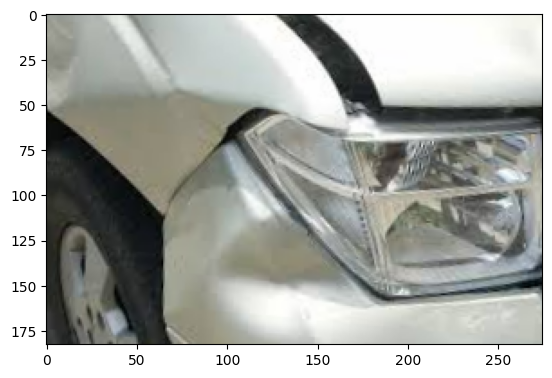

In [ ]:
plt.imshow(samples[0])

In [ ]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data_augmentation_2/data_2/train/front
data_augmentation_2/data_2/train/rear
data_augmentation_2/data_2/train/side
data_augmentation_2/data_2/test/front
data_augmentation_2/data_2/test/rear
data_augmentation_2/data_2/test/side


In [ ]:
for i in tqdm(train_front):
    create_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/00-front')

100%|██████████| 425/425 [00:08<00:00, 47.88it/s]


In [ ]:
for i in tqdm(train_rear):
    create_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/01-rear')

100%|██████████| 298/298 [00:05<00:00, 54.38it/s]


In [ ]:
for i in tqdm(train_side):
    create_images(i,train_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/training/02-side')

100%|██████████| 272/272 [00:05<00:00, 49.07it/s]


In [ ]:
for i in tqdm(test_front):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/00-front')

100%|██████████| 73/73 [00:00<00:00, 502.09it/s]


In [ ]:
for i in tqdm(test_rear):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/01-rear')

100%|██████████| 58/58 [00:00<00:00, 504.27it/s]


In [ ]:
for i in tqdm(test_side):
    save_images(i,test_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data2a/validation/02-side')

100%|██████████| 48/48 [00:00<00:00, 493.06it/s]


## Data -3

In [ ]:
#Getting a sample file name from list of file names
sample_file = random.choice(train_severe)

In [ ]:
#Getting a random rotation between -20 and 20
rotation = random.randint(-20,20)

In [ ]:
augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

In [ ]:
sample_img = image.load_img('/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/03-severe'+'/'+sample_file)

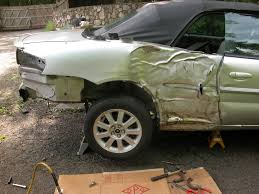

In [ ]:
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)

In [ ]:
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

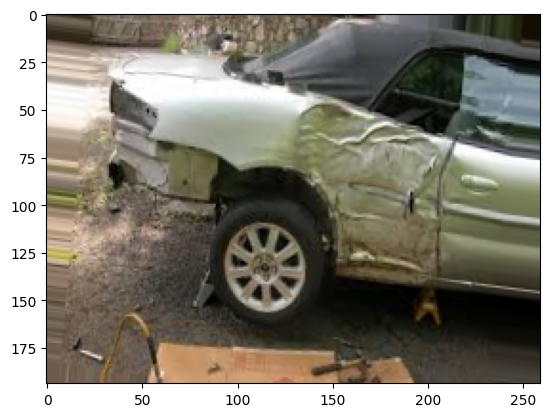

In [ ]:
plt.imshow(samples[0])

In [ ]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data_augmentation_2/data_3/train/minor
data_augmentation_2/data_3/train/moderate
data_augmentation_2/data_3/train/severe
data_augmentation_2/data_3/test/minor
data_augmentation_2/data_3/test/moderate
data_augmentation_2/data_3/test/severe


In [ ]:
for i in tqdm(train_minor):
    create_images(i,train_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/01-minor')

100%|██████████| 278/278 [00:05<00:00, 52.57it/s]


In [ ]:
for i in tqdm(train_moderate):
    create_images(i,train_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/02-moderate')

100%|██████████| 315/315 [00:06<00:00, 46.29it/s]


In [ ]:
for i in tqdm(train_severe):
    create_images(i,train_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/training/03-severe')

100%|██████████| 386/386 [00:07<00:00, 50.09it/s]


In [ ]:
for i in tqdm(test_minor):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/01-minor')

100%|██████████| 48/48 [00:00<00:00, 511.10it/s]


In [ ]:
for i in tqdm(test_moderate):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:00<00:00, 507.45it/s]


In [ ]:
for i in tqdm(test_severe):
    save_images(i,test_save_path_3,'/content/drive/MyDrive/CarDamageDataset/car-damage-dataset/data3a/validation/03-severe')

100%|██████████| 68/68 [00:00<00:00, 491.86it/s]


## Files Counts after Augmentation:

In [ ]:
data_1_files = len(os.listdir('data_augmentation_2/data_1/train/damaged'))+len(os.listdir('data_augmentation_2/data_1/train/not_damaged'))

In [ ]:
print('Number of files for all classes damaged, not damaged is ',data_1_files)

Number of files for all classes damaged, not damaged is  3700


In [ ]:
data_2_files = len(os.listdir('data_augmentation_2/data_2/train/front'))+len(os.listdir('data_augmentation_2/data_2/train/rear'))+len(os.listdir('data_augmentation_2/data_2/train/side'))

In [ ]:
print('Number of files for all classes front,rear,side is ',data_2_files)

Number of files for all classes front,rear,side is  1990


In [ ]:
data_3_files = len(os.listdir('data_augmentation_2/data_3/train/minor'))+len(os.listdir('data_augmentation_2/data_3/train/moderate'))+len(os.listdir('data_augmentation_2/data_3/train/severe'))

In [ ]:
print('Number of files for all classes minor,moderate,severe is ',data_3_files)

Number of files for all classes minor,moderate,severe is  1958


In [ ]:
import shutil
shutil.make_archive('data_augmentation_1', 'zip', 'data_augmentation_1')

'/content/data_augmentation_1.zip'

In [ ]:
shutil.make_archive('data', 'zip', 'data')

'/content/data.zip'

In [ ]:
shutil.make_archive('data_augmentation_2', 'zip', 'data_augmentation_2')

'/content/data_augmentation_2.zip'